In [1]:
import numpy as np
import pyedflib
import matplotlib.pyplot as mp
import seaborn as sns
sns.set()
% matplotlib inline

In [2]:
# Read the signal
f = pyedflib.EdfReader("Dataset/chb01_01.edf")

In [3]:
# number of signals
n = f.signals_in_file

In [4]:
# Extract the signals
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

# create time axis
fs = f.samplefrequency(1)
t = np.linspace(0, 1000/fs, num=1000)

Text(0,0.5,'Signal')

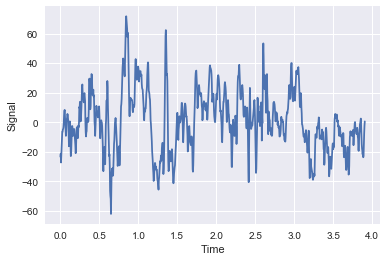

In [5]:
# plot a sample signal
mp.plot(t, sigbufs[10, 1000:2000])
mp.xlabel('Time')
mp.ylabel('Signal')

Text(0,0.5,'Signal')

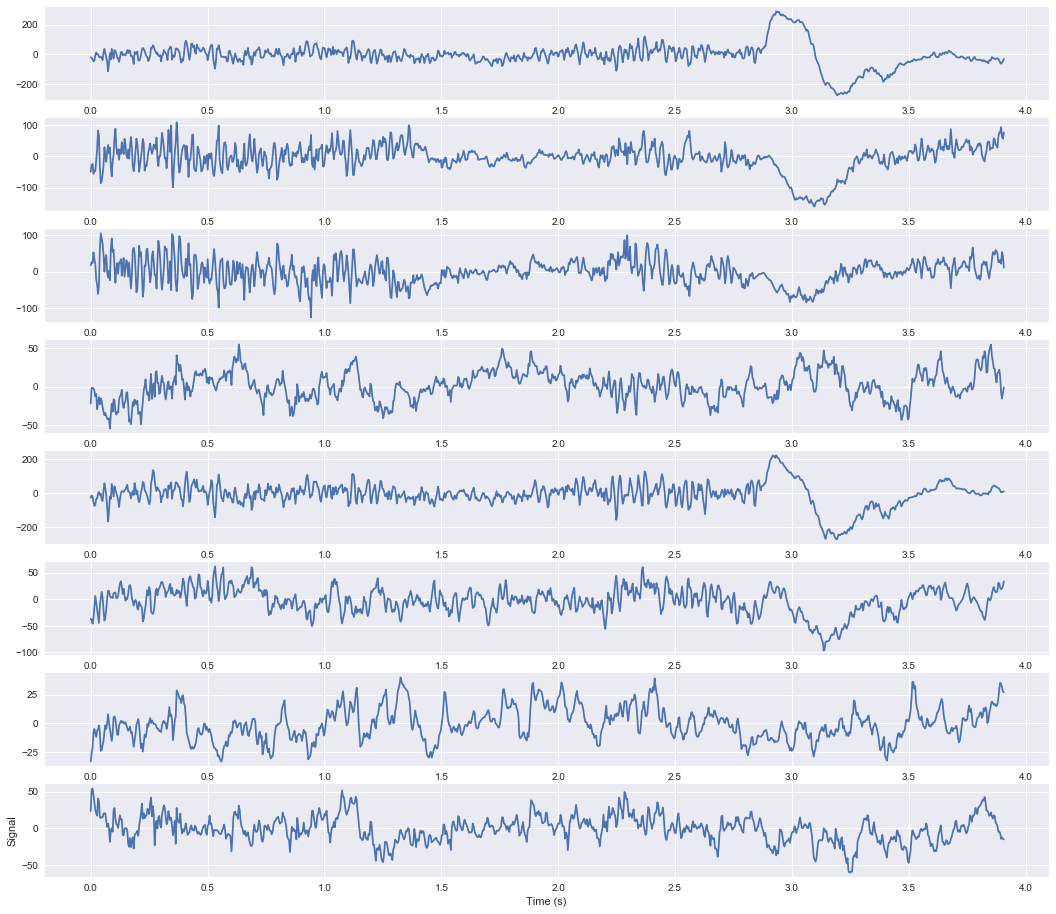

In [6]:
# Choosing 8 channels
mp.figure(figsize=(18, 16))
ax0 = mp.subplot(811)
mp.plot(t, sigbufs[0, 1000:2000])
ax1 = mp.subplot(812, sharex=ax0)
mp.plot(t, sigbufs[1, 1000:2000])
ax2 = mp.subplot(813, sharex=ax0)
mp.plot(t, sigbufs[2, 1000:2000])
ax3 = mp.subplot(814, sharex=ax0)
mp.plot(t, sigbufs[3, 1000:2000])
ax4 = mp.subplot(815, sharex=ax0)
mp.plot(t, sigbufs[4, 1000:2000])
ax5 = mp.subplot(816, sharex=ax0)
mp.plot(t, sigbufs[5, 1000:2000])
ax6 = mp.subplot(817, sharex=ax0)
mp.plot(t, sigbufs[6, 1000:2000])
ax7 = mp.subplot(818, sharex=ax0)
mp.plot(t, sigbufs[7, 1000:2000])
mp.xlabel('Time (s) ')
mp.ylabel('Signal')

In [7]:
from sklearn.decomposition import PCA
# Performing PCA
pca = PCA(n_components=1).fit_transform(sigbufs[0:7, 1000:2000].T)

Text(0,0.5,'Signal')

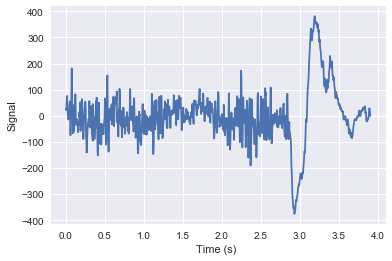

In [8]:
# plot the PCA graph
mp.plot(t, pca)
mp.xlabel('Time (s) ')
mp.ylabel('Signal')

In [9]:
Subset = sigbufs[0:8, 1000:2000]
# trans Cranial Simulation
f_sin = 5 # Hertz
sin_t = np.arange(1000)
y = np.sin(2 * np.pi * f_sin * sin_t / 256)*500

Text(0,0.5,'tCS signal')

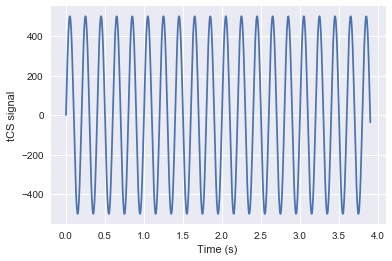

In [10]:
mp.plot(t, y)
mp.xlabel('Time (s) ')
mp.ylabel('tCS signal')

Text(0,0.5,'tCS signal')

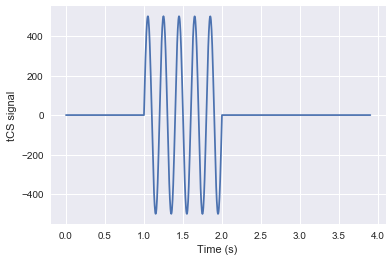

In [11]:
# lets make the tCS Signal for one second between 2 and 3 seconds
y[(t<1.0) | (t>2.0)] = 0

mp.plot(t, y)
mp.xlabel('Time (s) ')
mp.ylabel('tCS signal')

In [12]:
# mixing the tCS signal with EEG signal
Subset = Subset + y

Text(0,0.5,'Signal')

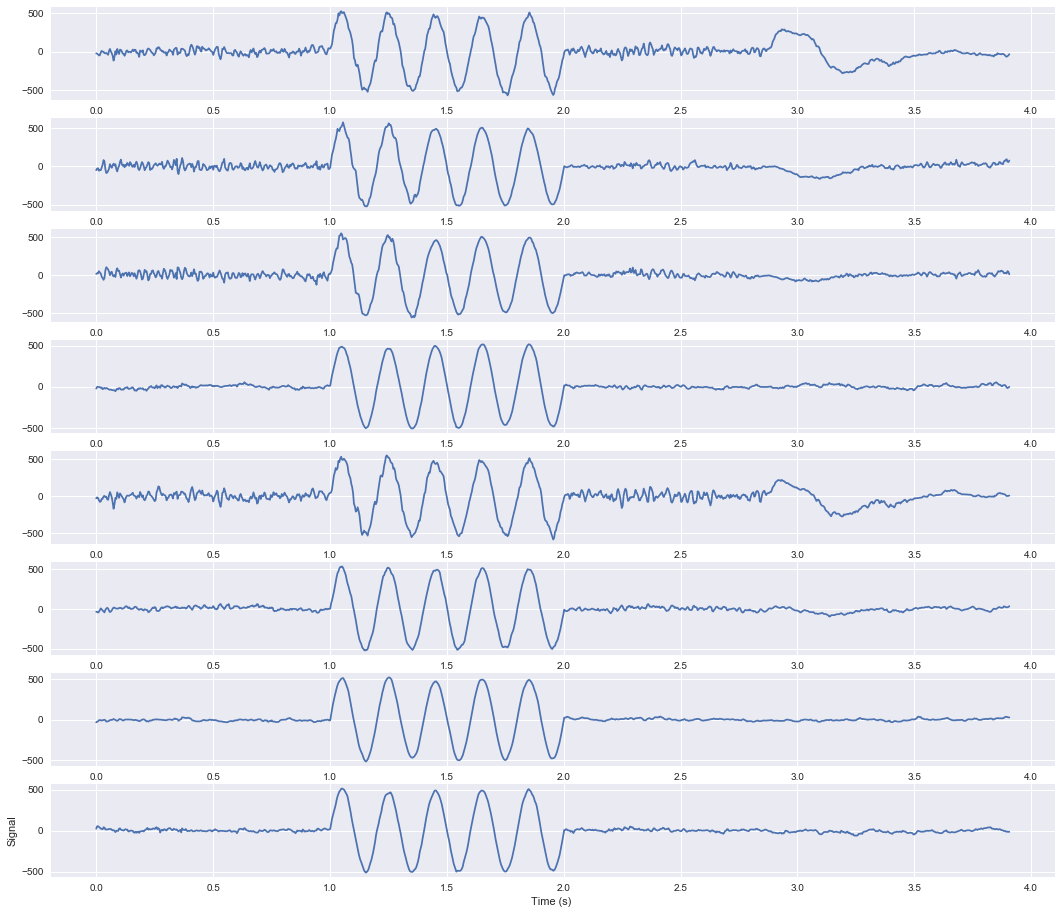

In [13]:
# Choosing 8 channels
mp.figure(figsize=(18, 16))
ax0 = mp.subplot(811)
mp.plot(t, Subset[0])
ax1 = mp.subplot(812, sharex=ax0)
mp.plot(t, Subset[1])
ax2 = mp.subplot(813, sharex=ax0)
mp.plot(t, Subset[2])
ax3 = mp.subplot(814, sharex=ax0)
mp.plot(t, Subset[3])
ax4 = mp.subplot(815, sharex=ax0)
mp.plot(t, Subset[4])
ax5 = mp.subplot(816, sharex=ax0)
mp.plot(t, Subset[5])
ax6 = mp.subplot(817, sharex=ax0)
mp.plot(t, Subset[6])
ax7 = mp.subplot(818, sharex=ax0)
mp.plot(t, Subset[7])
mp.xlabel('Time (s) ')
mp.ylabel('Signal')

In [40]:
# Calculate the moving averages
M = int(np.floor(5))
A = np.zeros((8, 1000))
for s in range(0, 8):
    for i in range(M,1000-M):
        A[s, i] = (np.mean(Subset[s, i-M:i+M]))

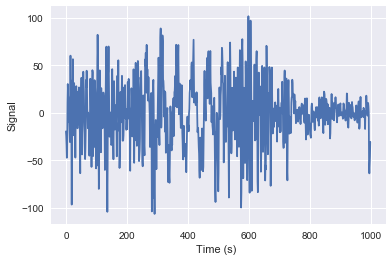

In [44]:
mp.plot(Subset[0, :] - A[0, :])
mp.xlabel('Time (s) ')
mp.ylabel('Signal')

Subset = Subset - A

In [45]:
# PCA on the SMA signals
pca2 = PCA(n_components=1).fit_transform(Subset.T)

Text(0,0.5,'Signal')

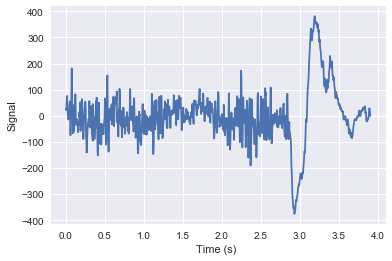

In [46]:
# plot the PCA graph
mp.plot(t, pca)
mp.xlabel('Time (s) ')
mp.ylabel('Signal')